# Bangalore Housing Price Analysis

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
df=pd.read_csv("bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### EXPLORATORY DATA ANALYSIS

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
#Checking the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### There are 13320 samples and 9 features. There are few features with missing values.

In [6]:
df.describe(include="all")

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [7]:
print(df.isnull())
print("-----------------------------")
print(df.duplicated())
print("-----------------------------")
print(df.isnull().sum())
print("-----------------------------")
print(df.duplicated().sum())
print("-----------------------------")
print(df.nunique())

       area_type  availability  location   size  society  total_sqft   bath  \
0          False         False     False  False    False       False  False   
1          False         False     False  False    False       False  False   
2          False         False     False  False     True       False  False   
3          False         False     False  False    False       False  False   
4          False         False     False  False     True       False  False   
...          ...           ...       ...    ...      ...         ...    ...   
13315      False         False     False  False    False       False  False   
13316      False         False     False  False     True       False  False   
13317      False         False     False  False    False       False  False   
13318      False         False     False  False    False       False  False   
13319      False         False     False  False     True       False  False   

       balcony  price  
0        False  False  
1  

## Data Cleaning

In [8]:
df1=df.drop_duplicates()
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [9]:
print(df1.duplicated().sum())
print("-----------------------------")
print(df1.describe(include="all"))
print("-----------------------------")  
print(df1.isnull().sum())  
print("-----------------------------") 
print(df1.columns)    

0
-----------------------------
                   area_type   availability    location   size  society  \
count                  12791          12791       12790  12775     7463   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8317          10172         523   4931       68   
mean                     NaN            NaN         NaN    NaN      NaN   
std                      NaN            NaN         NaN    NaN      NaN   
min                      NaN            NaN         NaN    NaN      NaN   
25%                      NaN            NaN         NaN    NaN      NaN   
50%                      NaN            NaN         NaN    NaN      NaN   
75%                      NaN            NaN         NaN    NaN      NaN   
max                      NaN            NaN         NaN    NaN      NaN   

       total_sqft          bath       balcony         price  
count

In [10]:
data=df1.copy()

In [11]:
data[pd.isnull(data["size"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [12]:
# Dropping samples with 3 or more missing records
data.dropna(axis=0, thresh = 7, inplace = True)
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [13]:
data.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5325
total_sqft         0
bath              57
balcony          589
price              0
dtype: int64

In [14]:
data[pd.isnull(data["location"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [15]:
data[data["society"]=="Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [16]:
data["location"]=data["location"].replace(np.nan,"Anantapura")
data["location"]

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12775, dtype: object

In [17]:
data.iloc[568]

area_type       Super built-up  Area
availability           Ready To Move
location                  Anantapura
size                           3 BHK
society                      Grare S
total_sqft                      1600
bath                             3.0
balcony                          2.0
price                           86.0
Name: 568, dtype: object

In [18]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5325
total_sqft         0
bath              57
balcony          589
price              0
dtype: int64

In [19]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [20]:
#Adding the "BHK" feature extracted from size

data["BHK"] = data["size"].apply(lambda x: int(x.split(" ")[0]))
data["BHK"]

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13316    4
13317    2
13318    4
Name: BHK, Length: 12775, dtype: int64

In [21]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2


In [22]:
data[pd.isnull(data["society"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25,3
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00,6
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00,3
...,...,...,...,...,...,...,...,...,...,...
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.00,4
13307,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805,3.0,3.0,134.00,3
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71,2
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00,2


In [23]:
# EXPLORE TOTAL SQFT FEATURE
type(data["total_sqft"])

pandas.core.series.Series

In [24]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

###### There seems to be some inconsistancies in the data like '1133 - 1384', which is a range rather than a particular numeric value. Lets check, if there are any more such inconsistancies.

In [25]:
# We create a function for finding inconsistancies in total_sqft,this function will return rows with a single numeric value in total_sqft
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
# But we need values that are inconsistant, so,
data[~data['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770,2


###### From above, total_sqft can be a range (e.g. 2957-3450,1042-1105,etc). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter, which one can convert to square ft using unit conversion. But,I  just drop such cases to keep things simple.

In [27]:
# Define a function to perform the above mentioned job.
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
      return None

In [28]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300.0,4.0,NaN,600.00,4
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310.0,3.0,1.0,63.25,3
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020.0,6.0,NaN,370.00,6


In [29]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2


In [30]:
data["total_sqft"].isnull().sum()

46

In [31]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5325
total_sqft        46
bath              57
balcony          589
price              0
BHK                0
dtype: int64

In [32]:
data.drop(["society","size"],axis=1,inplace=True)

In [33]:
data

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2


In [34]:
print(data["total_sqft"].describe())
print("---------------------------------")
print(data["bath"].describe())
print("-----------------------------------")
print(data["balcony"].describe())

count    12729.000000
mean      1568.767963
std       1259.895965
min          1.000000
25%       1100.000000
50%       1280.000000
75%       1690.000000
max      52272.000000
Name: total_sqft, dtype: float64
---------------------------------
count    12718.000000
mean         2.708602
std          1.357764
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64
-----------------------------------
count    12186.000000
mean         1.582308
std          0.822536
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64


In [35]:
print("sqft_median :",data['total_sqft'].median())
print("bath_median :",data['bath'].median())
print("balcony_median :",data['balcony'].median())

sqft_median : 1280.0
bath_median : 2.0
balcony_median : 2.0


In [36]:
values = {
    'total_sqft': 1280,       
    'bath': 2.0,  
    'balcony': 2.0,   
}
data.fillna(values, inplace=True)  ## Fill NaN values in the DataFrame using the dictionary
print(data)

                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13314  Super built-up  Area  Ready To Move         Green Glen Layout   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   

       total_sqft  bath  balcony   price  BHK  
0          1056.0   2.0      1.0   39.07    2  
1          2600.0   5.0      3.0  120.0

In [37]:
data.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
BHK             0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12775 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12775 non-null  object 
 1   availability  12775 non-null  object 
 2   location      12775 non-null  object 
 3   total_sqft    12775 non-null  float64
 4   bath          12775 non-null  float64
 5   balcony       12775 non-null  float64
 6   price         12775 non-null  float64
 7   BHK           12775 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 898.2+ KB


In [39]:
data["price_per_sqft"] =round( data["price"] * 100000 / data["total_sqft"],3)
data["sqft_per_bhk"] =round( data["total_sqft"] / data["BHK"],3)

In [40]:
data

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,sqft_per_bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.811,528.000
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.385,650.000
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.556,480.000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.891,507.000
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000,600.000
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612,571.667
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5,6689.835,690.600
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,2.0,400.00,4,11111.111,900.000
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545,570.500


In [41]:
data.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft,sqft_per_bhk
count,12775.000000,12775.000000,12775.000000,12775.000000,12775.000000,1.277500e+04,12775.000000
mean,1567.728173,2.705440,1.601566,114.336929,2.817847,8.040235e+03,575.706017
std,1257.744385,1.355554,0.808111,151.500344,1.311841,1.084871e+05,394.811181
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678300e+02,0.250000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.299044e+03,472.667000
50%,1280.000000,2.000000,2.000000,73.000000,3.000000,5.488621e+03,552.000000
75%,1689.000000,3.000000,2.000000,121.000000,3.000000,7.407407e+03,626.667000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07,26136.000000


In [42]:
data.to_csv('Bangalore_houseprice_cleaned_data.csv', index=False)

## Data visualization

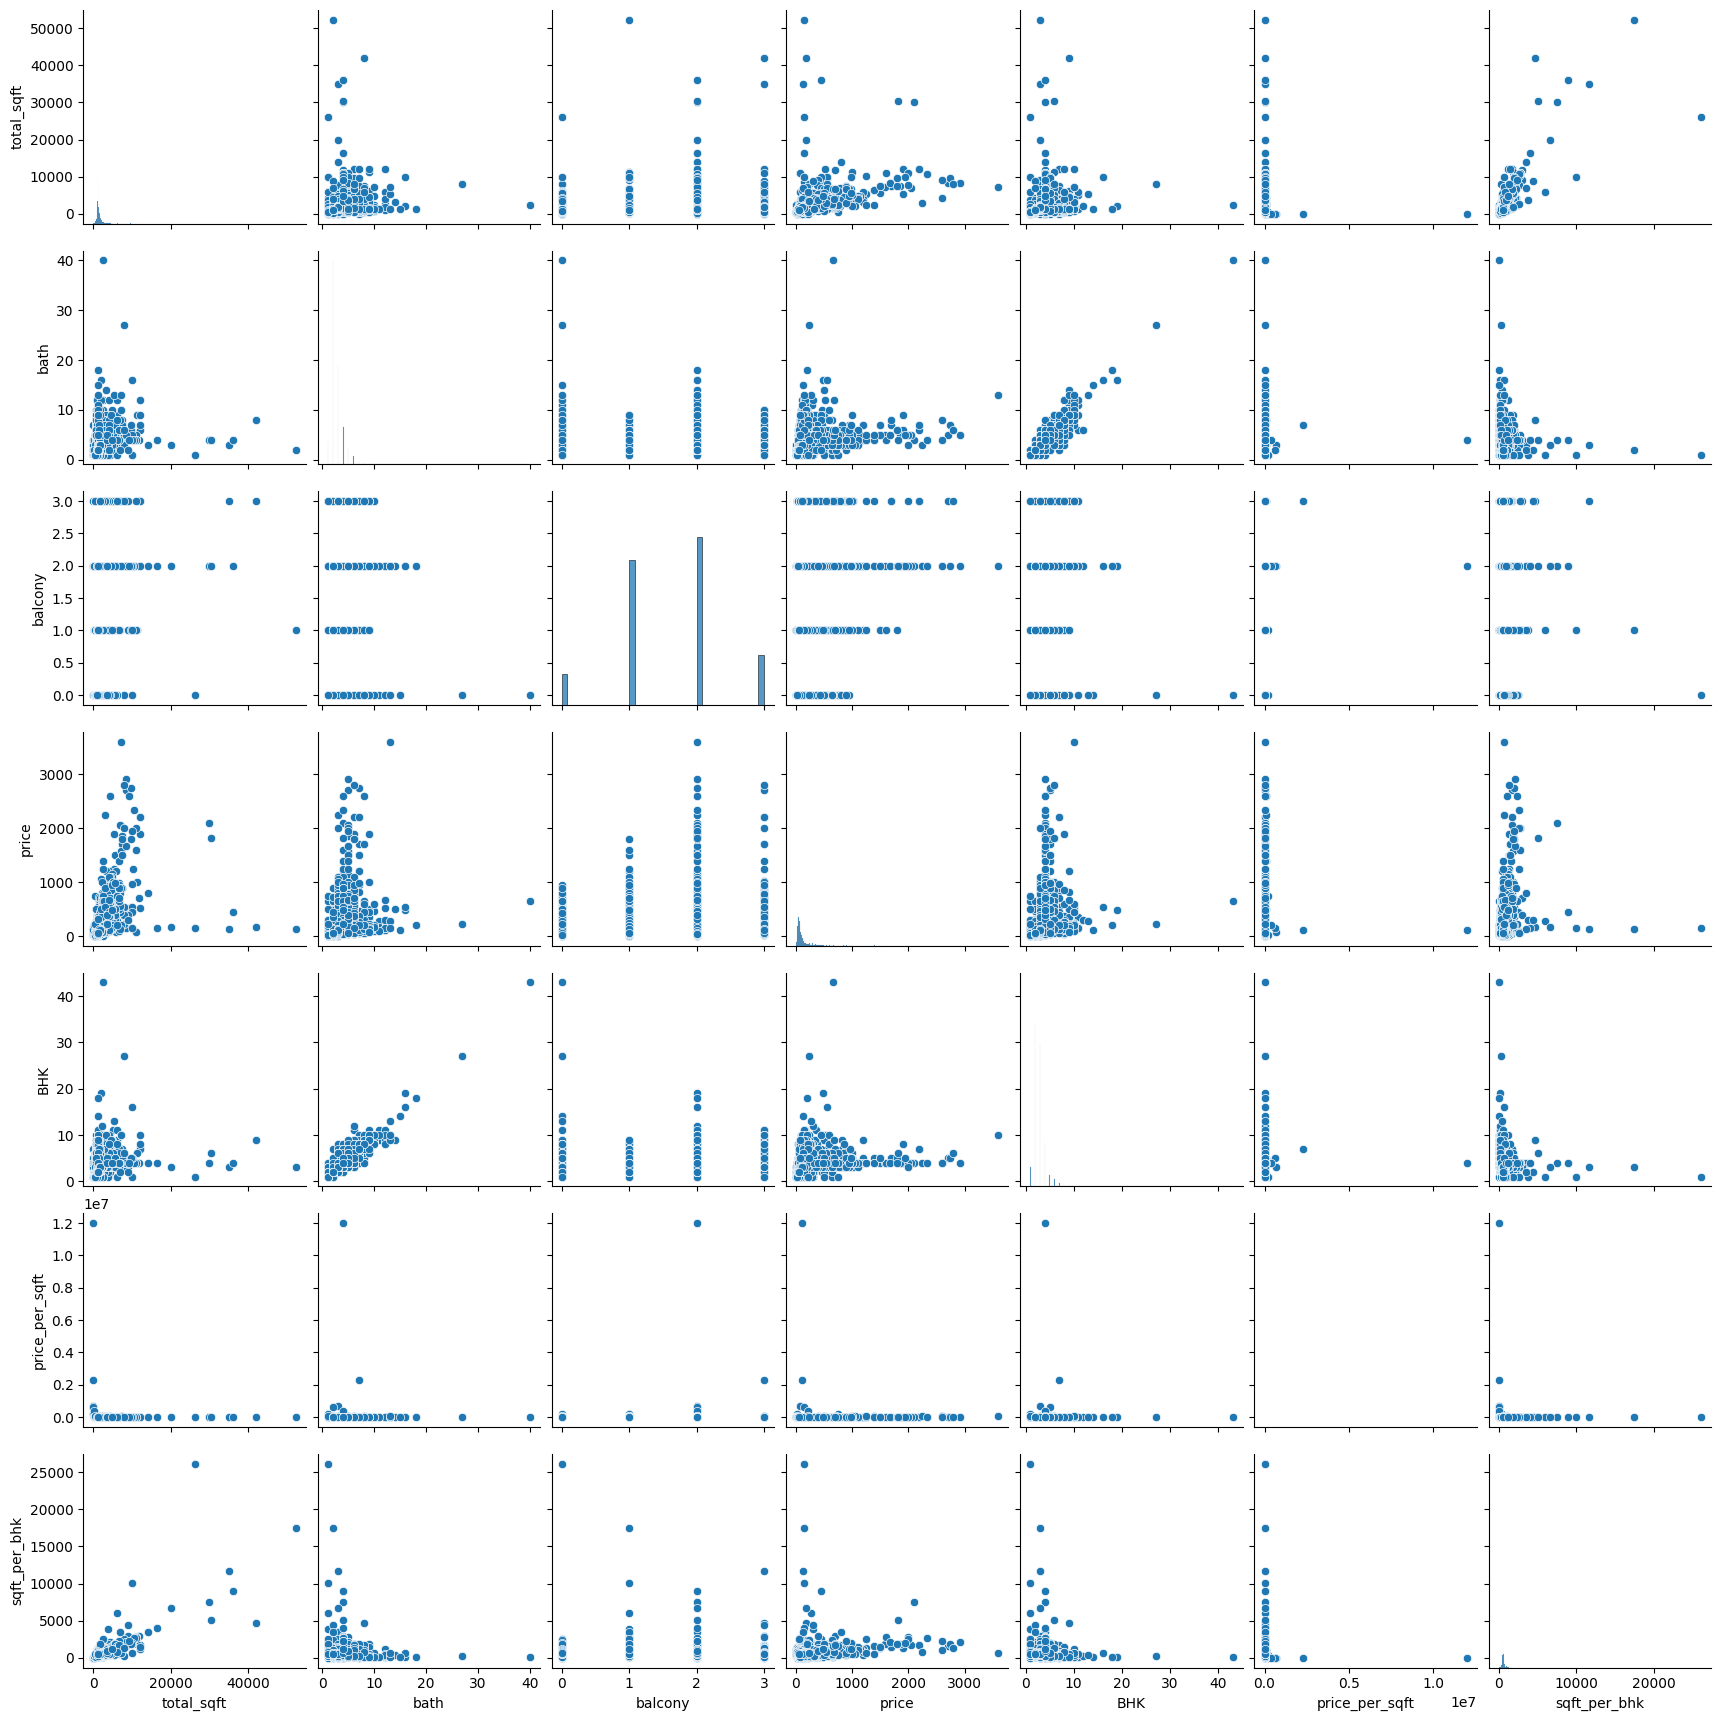

In [43]:
sns.pairplot(data)

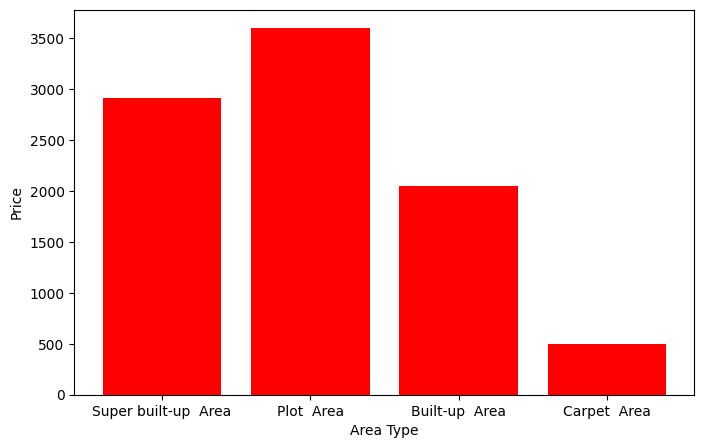

In [44]:
# Bar plot
plt.figure(figsize=(8,5))
plt.bar(data["area_type"],data["price"],color='r')
plt.xlabel("Area Type")
plt.ylabel("Price")
plt.show()

##### From the diagram it is clear that,the highest price in plot area compared to other area type.

C:\Users\hudha\AppData\Local\Temp\ipykernel_13860\3274747083.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="area_type",data=data,palette="viridis")


Text(0, 0.5, 'area count')

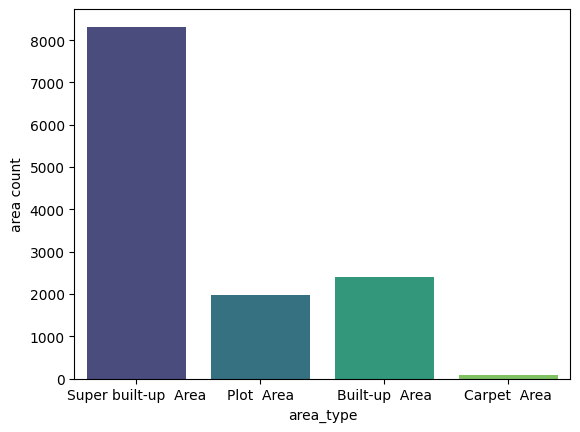

In [45]:
sns.countplot(x="area_type",data=data,palette="viridis")
plt.ylabel("area count")

From the countplot,we can see that most no.of houses are in super build-up area.

<Axes: xlabel='area_type', ylabel='price'>

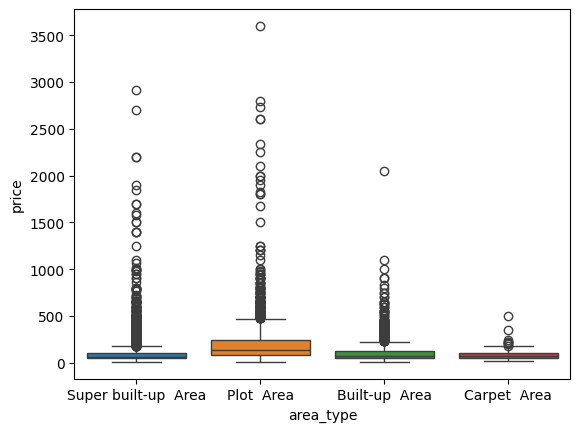

In [46]:
sns.boxplot(x="area_type",y="price",data=data,hue="area_type")

In [47]:
# Visualize feature relationships using a correlation matrix
data1=data.drop(["area_type","availability","location"],axis=1)
data1

,total_sqft,bath,balcony,price,BHK,price_per_sqft,sqft_per_bhk
0,1056.0,2.0,1.0,39.07,2,3699.811,528.000
1,2600.0,5.0,3.0,120.00,4,4615.385,650.000
2,1440.0,2.0,3.0,62.00,3,4305.556,480.000
3,1521.0,3.0,1.0,95.00,3,6245.891,507.000
4,1200.0,2.0,1.0,51.00,2,4250.000,600.000
...,...,...,...,...,...,...,...
13314,1715.0,3.0,3.0,112.00,3,6530.612,571.667
13315,3453.0,4.0,0.0,231.00,5,6689.835,690.600
13316,3600.0,5.0,2.0,400.00,4,11111.111,900.000
13317,1141.0,2.0,1.0,60.00,2,5258.545,570.500


In [48]:
correlation=data1.corr()
correlation

,total_sqft,bath,balcony,price,BHK,price_per_sqft,sqft_per_bhk
total_sqft,1.000000,0.384525,0.152191,0.573250,0.343301,-0.008584,0.739115
bath,0.384525,1.000000,0.205079,0.451436,0.896675,0.030761,-0.027775
balcony,0.152191,0.205079,1.000000,0.123731,0.191690,0.009364,0.018460
price,0.573250,0.451436,0.123731,1.000000,0.395126,0.028151,0.285279
BHK,0.343301,0.896675,0.191690,0.395126,1.000000,0.030743,-0.105280
price_per_sqft,-0.008584,0.030761,0.009364,0.028151,0.030743,1.000000,-0.018279
sqft_per_bhk,0.739115,-0.027775,0.018460,0.285279,-0.105280,-0.018279,1.000000


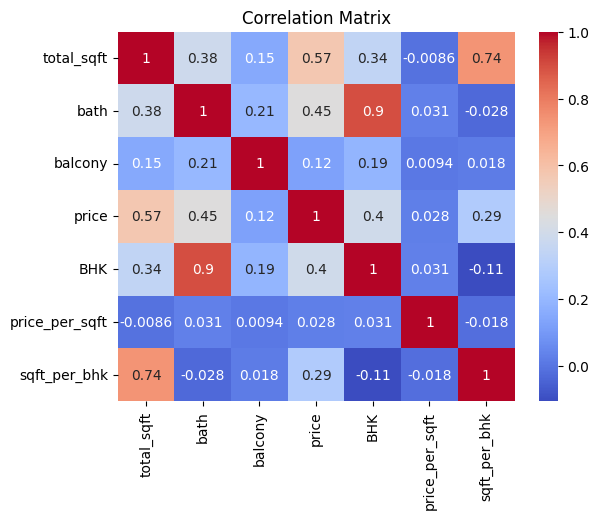

In [49]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

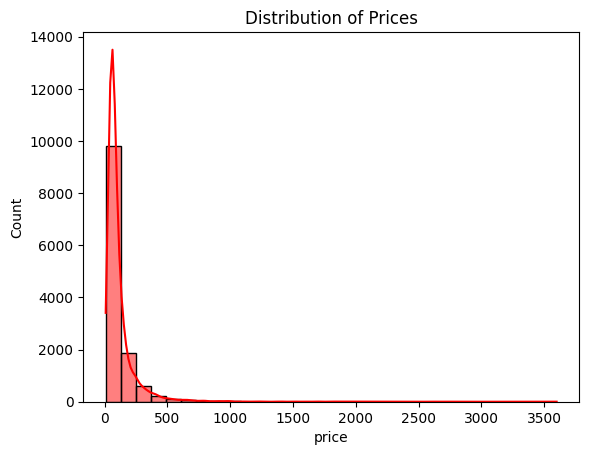

In [50]:
#Histogram plot for distribution of prices
sns.histplot(data['price'], bins=30,kde=True,color='r')
plt.title("Distribution of Prices")
plt.show()

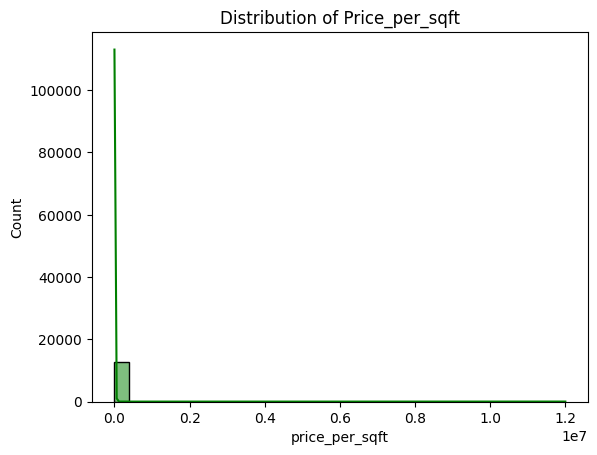

In [51]:
#Histogram plot for distribution of prices
sns.histplot(data['price_per_sqft'], bins=30,kde=True,color='g')
plt.title("Distribution of Price_per_sqft")
plt.show()

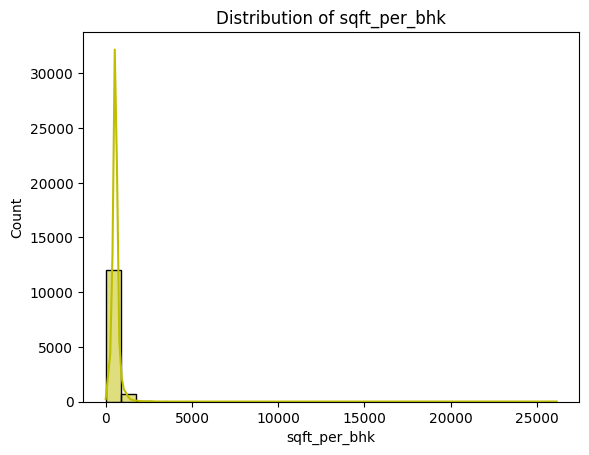

In [52]:
#Histogram plot for distribution of prices
sns.histplot(data['sqft_per_bhk'], bins=30,kde=True,color='y')
plt.title("Distribution of sqft_per_bhk")
plt.show()

In [53]:
data2=data.copy()

In [54]:
data2["log_price"]=np.log(data["price"])

<Axes: xlabel='log_price', ylabel='Count'>

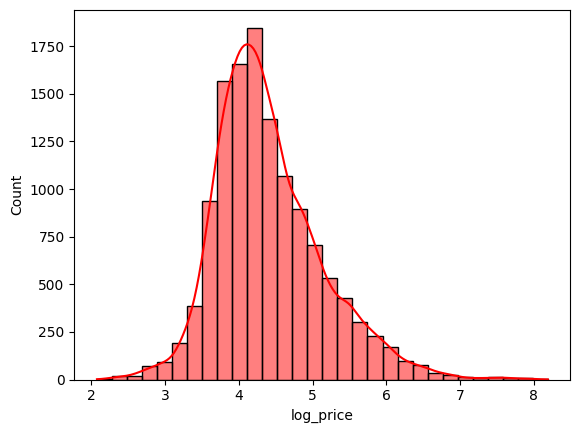

In [55]:
sns.histplot(data2["log_price"],color="r",bins=30,kde=True,)

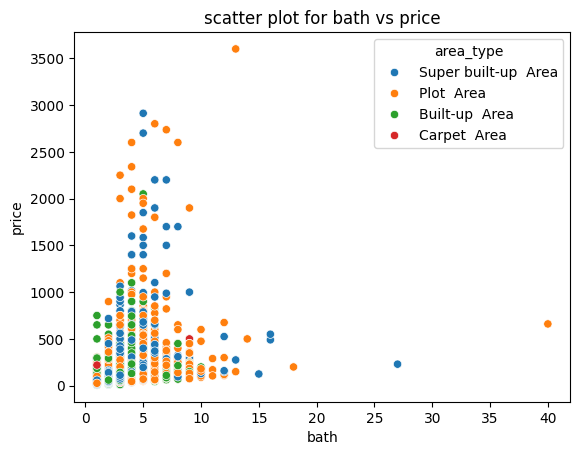

In [62]:
sns.scatterplot(x="bath",y="price",hue="area_type",data=data)
plt.xlabel("bath")
plt.ylabel("price")
plt.title("scatter plot for bath vs price")
plt.show()

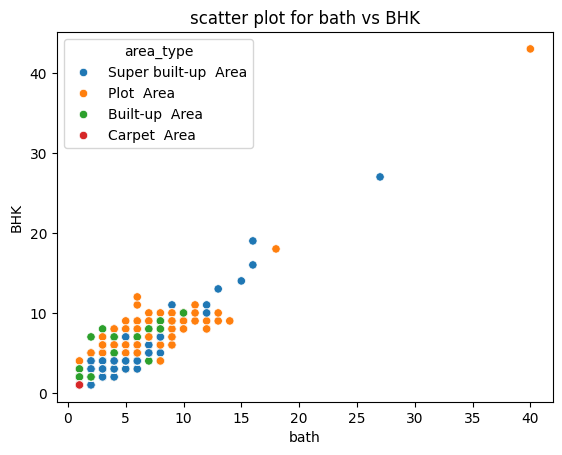

In [63]:
sns.scatterplot(x="bath",y="BHK",hue="area_type",data=data)
plt.xlabel("bath")
plt.ylabel("BHK")
plt.title("scatter plot for bath vs BHK")
plt.show()

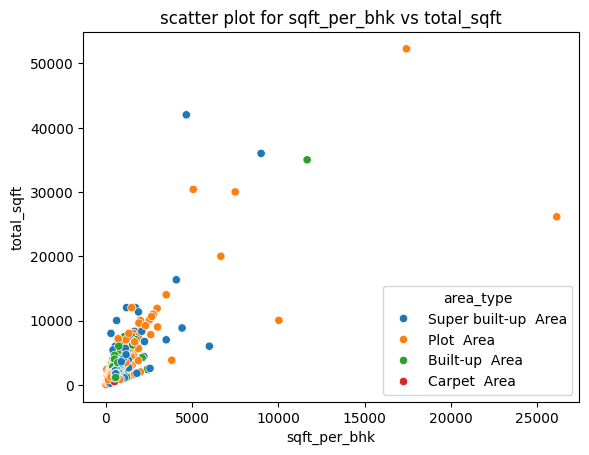

In [64]:
sns.scatterplot(x="sqft_per_bhk",y="total_sqft",hue="area_type",data=data)
plt.xlabel("sqft_per_bhk")
plt.ylabel("total_sqft")
plt.title("scatter plot for sqft_per_bhk vs total_sqft")
plt.show()

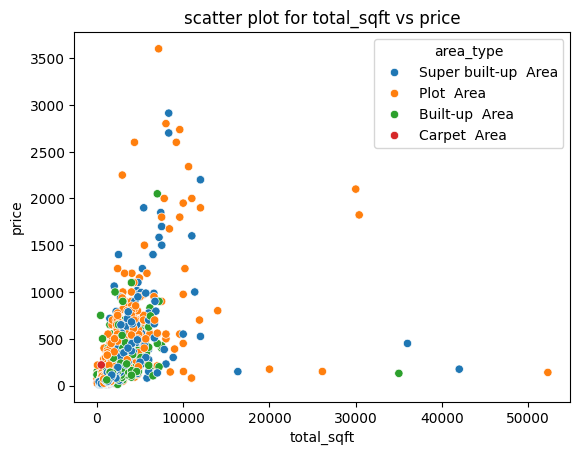

In [67]:
sns.scatterplot(x="total_sqft",y="price",hue="area_type",data=data)
plt.xlabel("total_sqft")
plt.ylabel("price")
plt.title("scatter plot for total_sqft vs price")
plt.show()